# Training a network on the CIFAR10 dataset

We'll train a custom network on the cifar10 dataset. CIFAR10 is a dataset of images categorized into 10 categories. Goal of the network is to classify the images into the correct category.

Let's start with loading any libraries you need.

In [16]:
# Load libraries you need here
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense




Load the data from the CIFAR10. The CIFAR-10 dataset contains 60,000 32x32 color images in 10 classes.
Info can be found in the documentation: https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10/load_data

In [12]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
print(f'Shape of the training data: {x_train.shape},{y_train.shape}')
print(f'Shape of the test data: {x_test.shape},{y_test.shape}')
# Use a portion of the training data as validation data. Do you need to do any preprocessing?
# Normalization: Scale the pixel values to a range between 0 and 1. 
# Data Augmentation
# One-Hot Encoding

Shape of the training data: (50000, 32, 32, 3),(50000, 1)
Shape of the test data: (10000, 32, 32, 3),(10000, 1)


In [13]:
#Reshape and Normalize the image data
x_train, x_test = x_train.reshape(-1, 32,32,3) / 255.0, x_test.reshape(-1, 32,32,3) / 255.0 # x_train (50000, 32, 32, 3),# x_test (10000, 32, 32, 3)

#One-Hot Encode the labels 
y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)

#train,test-split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

print(f'Shape of the training data: {x_train.shape},{y_train.shape}')
print(f'Shape of the test data: {x_val.shape},{y_val.shape}')



Shape of the training data: (40000, 32, 32, 3),(40000, 10)
Shape of the test data: (10000, 32, 32, 3),(10000, 10)


Create your model using conv2D layers, some type of pooling and finish with a dense network.

In [17]:
model = Sequential([
# Your model here
Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32, 32, 3)),
MaxPooling2D(pool_size=(2,2)),
Flatten(),
Dense(64, activation='relu'),
Dense(10, activation='sigmoid')
])
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])


Train your model. Since the dataset is so big not a lot of epochs should be needed to start seeing results.

In [18]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))


Epoch 1/10


1250/1250 [==============================] - 36s 24ms/step - loss: 1.5849 - accuracy: 0.4319 - val_loss: 1.3211 - val_accuracy: 0.5329
Epoch 2/10
1250/1250 [==============================] - 25s 20ms/step - loss: 1.2560 - accuracy: 0.5588 - val_loss: 1.2193 - val_accuracy: 0.5753
Epoch 3/10
1250/1250 [==============================] - 23s 18ms/step - loss: 1.1444 - accuracy: 0.5974 - val_loss: 1.1629 - val_accuracy: 0.5945
Epoch 4/10
1250/1250 [==============================] - 26s 20ms/step - loss: 1.0678 - accuracy: 0.6274 - val_loss: 1.1512 - val_accuracy: 0.6029
Epoch 5/10
1250/1250 [==============================] - 23s 18ms/step - loss: 1.0163 - accuracy: 0.6447 - val_loss: 1.1296 - val_accuracy: 0.6106
Epoch 6/10
1250/1250 [==============================] - 20s 16ms/step - loss: 0.9690 - accuracy: 0.6626 - val_loss: 1.1310 - val_accuracy: 0.6131
Epoch 7/10
1250/1250 [==============================] - 23s 18ms/step - loss: 0.9217 - accuracy: 0.6803 - val_loss: 1.0770

Visualize the model performance

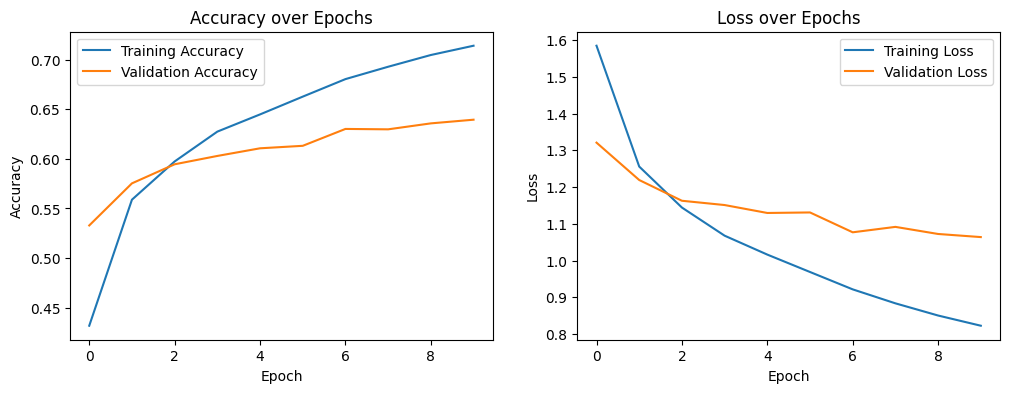

In [19]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


Evaluate on the test set

In [20]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)

# prints and plots you might need to evaluate.
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')


313/313 - 2s - loss: 1.0812 - accuracy: 0.6335 - 2s/epoch - 6ms/step
Test Loss: 1.0812
Test Accuracy: 0.6335


# Excercise
Experiment with different architectures and try to find a model that performs well.